# Cat vs Dog Recognition from Images using Deep Learning, Keras and Microsoft Kaggle Dataset

## Part 2: Training Our Model
For this part, we need to run "Preparing Datasets" first because we will be using Pre-Processed features and labels from part 1 to train our neural network.

### Importing Libraries

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten
from tensorflow.keras.callbacks import TensorBoard
import time

### Importing Dataset

In [2]:
X = pickle.load(open("features.pickle", "rb"))
y = pickle.load(open("labels.pickle", "rb"))

### Normalizing the Dataset

In [3]:
X = X/255.0
y = np.array(y)

### Building Our Neurat Network

In [10]:
network = Sequential()

#Adding Initial Block to the Network
network.add(Conv2D(64, (3, 3), input_shape=X.shape[1:]))
network.add(Activation('relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

#2nd Block in the Network
network.add(Conv2D(64, (3, 3)))
network.add(Activation('relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

#Flatten the Layers
network.add(Flatten())

#3rd Block in the Network
network.add(Dense(64))
network.add(Activation('relu'))

#Output Layer
network.add(Dense(1))
network.add(Activation('sigmoid'))

network.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Feeding Our Neural Network with Data

In [5]:
network.fit(X, y, batch_size=32, epochs=10, validation_split=0.1)

Epoch 1/10
702/702 [==============================] - 152s 198ms/step - loss: 0.6716 - accuracy: 0.5701 - val_loss: 0.5902 - val_accuracy: 0.6918
Epoch 2/10
702/702 [==============================] - 142s 203ms/step - loss: 0.5286 - accuracy: 0.7388 - val_loss: 0.4935 - val_accuracy: 0.7715
Epoch 3/10
702/702 [==============================] - 147s 209ms/step - loss: 0.4720 - accuracy: 0.7723 - val_loss: 0.4944 - val_accuracy: 0.7611
Epoch 4/10
702/702 [==============================] - 150s 214ms/step - loss: 0.4400 - accuracy: 0.7975 - val_loss: 0.4818 - val_accuracy: 0.7667
Epoch 5/10
702/702 [==============================] - 130s 185ms/step - loss: 0.4056 - accuracy: 0.8126 - val_loss: 0.4467 - val_accuracy: 0.7916
Epoch 6/10
702/702 [==============================] - 140s 200ms/step - loss: 0.3751 - accuracy: 0.8285 - val_loss: 0.4479 - val_accuracy: 0.7940
Epoch 7/10
702/702 [==============================] - 132s 188ms/step - loss: 0.3369 - accuracy: 0.8486 - val_loss: 0.4981 -

### Model Statistics

In [6]:
print("Accuracy:{:.2f}\nValidation Accuracy:{:.2f}\nLoss:{:.2f}\nValidation Loss:{:.2f}"
      .format(network.history.history.get('accuracy')[-1],
              network.history.history.get('val_accuracy')[-1],
              network.history.history.get('loss')[-1],
              network.history.history.get('val_loss')[-1]))

Accuracy:0.90
Validation Accuracy:0.77
Loss:0.24
Validation Loss:0.50


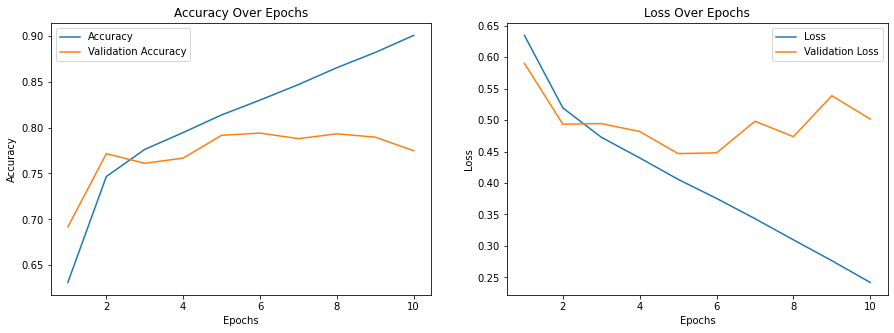

In [7]:
x_axis = [i for i in range(1,11)]

accuracies = network.history.history.get('accuracy')
val_accuracies = network.history.history.get('val_accuracy')
loss = network.history.history.get('loss')
val_loss = network.history.history.get('val_loss')

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax1.plot(x_axis, accuracies, label="Accuracy")
ax1.plot(x_axis, val_accuracies, label="Validation Accuracy")
ax1.set_title("Accuracy Over Epochs")
ax1.legend()
ax1.set(xlabel="Epochs", ylabel="Accuracy")

ax2.plot(x_axis, loss, label="Loss")
ax2.plot(x_axis, val_loss, label="Validation Loss")
ax2.set_title("Loss Over Epochs")
ax2.legend()
ax2.set(xlabel="Epochs", ylabel="Loss")

plt.show()

### Analyzing Model using TensorBoard
Use *python -m tensorflow.main --logdir=logs/* for running the TensorBoard Logs.

In [31]:
current_time = time.localtime(time.time())
NAME = "cat-vs-dog-62x2({}-{}-{}-{}-{}-{})".format(
    current_time.tm_mday, current_time.tm_mon, current_time.tm_year, 
    current_time.tm_hour, current_time.tm_min, current_time.tm_sec
)

tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))
network.fit(X, y, batch_size=32, epochs=10, validation_split=0.1, callbacks=[tensorboard])

Epoch 1/10
702/702 [==============================] - 123s 176ms/step - loss: 0.4652 - accuracy: 0.7817 - val_loss: 0.4806 - val_accuracy: 0.7756
Epoch 2/10
702/702 [==============================] - 119s 170ms/step - loss: 0.4267 - accuracy: 0.8029 - val_loss: 0.4920 - val_accuracy: 0.7727
Epoch 3/10
702/702 [==============================] - 128s 182ms/step - loss: 0.3916 - accuracy: 0.8227 - val_loss: 0.4535 - val_accuracy: 0.7800
Epoch 4/10
702/702 [==============================] - 126s 179ms/step - loss: 0.3529 - accuracy: 0.8433 - val_loss: 0.4579 - val_accuracy: 0.7840
Epoch 5/10
702/702 [==============================] - 119s 170ms/step - loss: 0.3165 - accuracy: 0.8616 - val_loss: 0.4611 - val_accuracy: 0.7824
Epoch 6/10
702/702 [==============================] - 115s 164ms/step - loss: 0.2743 - accuracy: 0.8850 - val_loss: 0.4763 - val_accuracy: 0.7904
Epoch 7/10
702/702 [==============================] - 143s 203ms/step - loss: 0.2219 - accuracy: 0.9111 - val_loss: 0.5642 -